In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1 = pd.read_csv('train.csv')
dt1 = pd.read_csv('test.csv')

In [3]:
d1.loc[:,d1.isna().sum()>0].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [4]:
target = d1['SalePrice']
d2 = d1.copy()

In [5]:
d2 = d2.drop(['SalePrice'], axis = 1)

In [6]:
df = pd.concat([d2,dt1],axis = 0)

In [7]:
df1 = df.copy()

In [8]:
df1 = df1.drop([i for i in df1.loc[:,df.isna().sum()>1500].columns], axis = 1)

In [9]:
def knn_imputing(df, na_column):
  df = df.copy()
  num_df= df.select_dtypes(np.number)
  non_na_columns = num_df.loc[:, num_df.isna().sum() == 0].columns

  y_train = num_df.loc[num_df[na_column].isna() == False, na_column]
  X_train = num_df.loc[num_df[na_column].isna() == False, non_na_columns]
  X_test = num_df.loc[num_df[na_column].isna() == True, non_na_columns]

  knn = KNeighborsRegressor()
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  df.loc[df[na_column].isna() == True, na_column] = y_pred

  return df

In [10]:
for i in ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']:
    df1[i]= df1[i].fillna(df1[i].mode()[0])

In [11]:
for i in df1.loc[:,df1.isna().sum()>0].columns:
  df1[i] = df1[i].fillna(df1[i].median())

In [13]:
df2 = df1.copy()

In [16]:
df2['MSSubClass'] = df2['MSSubClass'].astype('object')
df2['YearBuilt']=df2['YearBuilt'].astype('object')
df2['YearRemodAdd']=df2['YearRemodAdd'].astype('object')
df2['MoSold']=df2['MoSold'].astype('object')
df2['YrSold']=df2['YrSold'].astype('object')
df2['MasVnrArea']=df2['MasVnrArea'].astype('float64')
df2['GarageYrBlt']=df2['GarageYrBlt'].astype('object')

<AxesSubplot:>

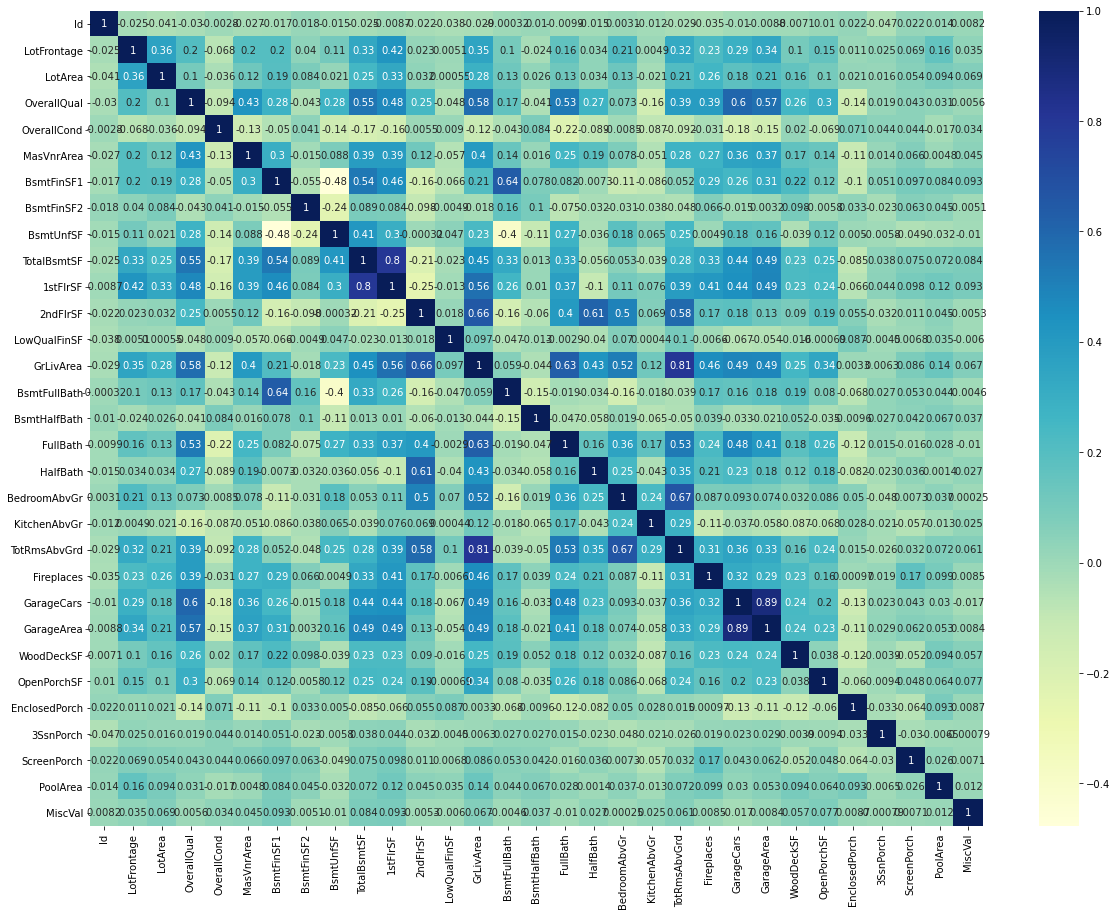

In [17]:
plt.figure(figsize = (20,15))
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

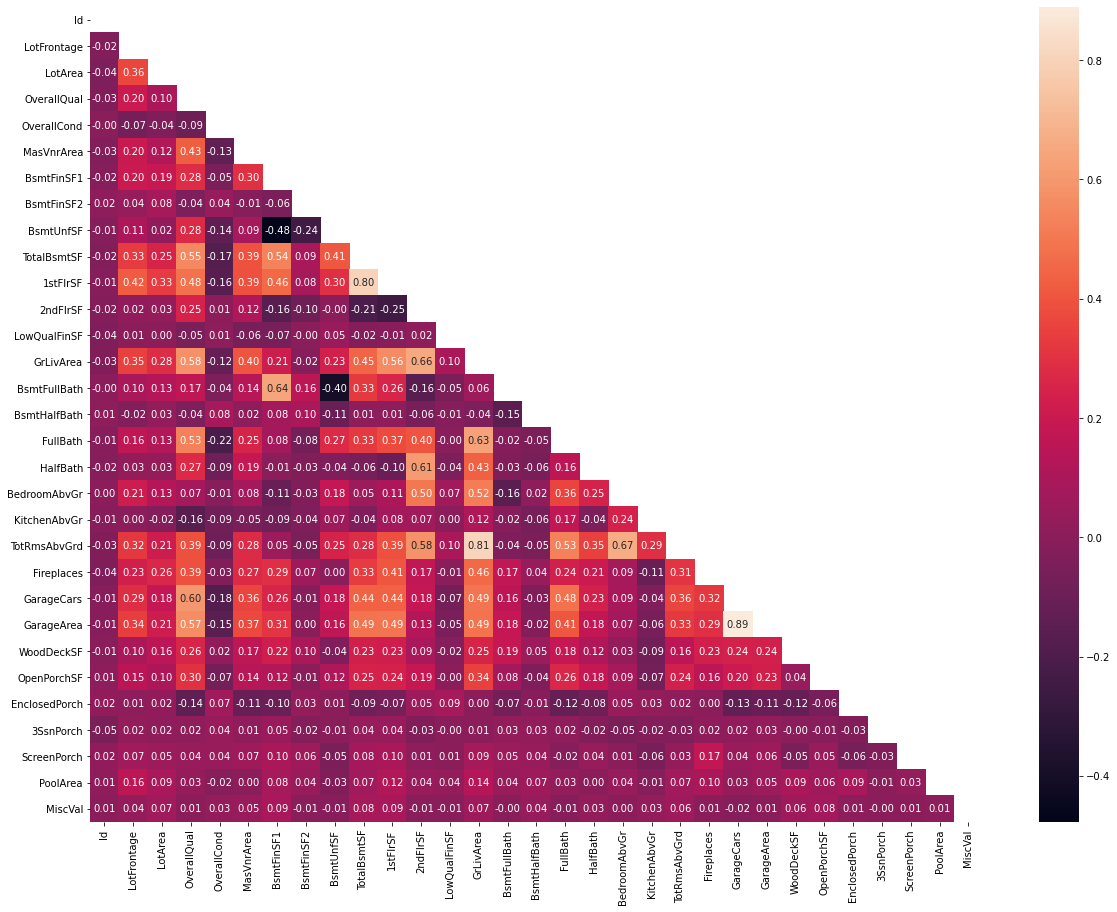

In [20]:
plt.figure(figsize = (20,15))
matrix=np.triu((df2[num_cols]).corr())
sns.heatmap((df2[num_cols]).corr(),annot=True,fmt='.2f',mask=matrix) 
plt.show()

89% correlation between GarageCars and GarageArea.

81% correlation between TotRmsAbvGrd and GrLivArea.

80% correlation between 1stFlrSF and TotalBsmtSF

79% correlation between GarageYrBlt and YearBuilt

a) Based on above we will remove the features: GarageYrBlt, TotRmsAbvGrd, GarageCars, 1stFlrSF

b) Also, BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF. Hence we will remove the BsmtFinSF1,2 and BsmtUnfSF

c) GarageYrBlt can also be removed as it is mostly same of very close to YearBuilt.

In [21]:
df2.drop(df2[['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars', '1stFlrSF','GarageYrBlt',
                        'TotRmsAbvGrd','GarageCars','1stFlrSF','BsmtFinSF1', 'BsmtFinSF2', 
                        'BsmtUnfSF']],axis=1, inplace=True)

In [23]:
num_cols = [f for f in df2.columns if df2.dtypes[f] != 'object']
cat_cols = [f for f in df2.columns if df2.dtypes[f] == 'object']

In [24]:
#finding the skewness
import scipy.stats
scipy.stats.skew(df2[num_cols])

array([ 0.        ,  1.67485156, 12.8224314 ,  0.19711045,  0.57031205,
        2.61359213,  1.16261612,  0.86167475, 12.088761  ,  1.26935769,
        0.62483211,  3.93159384,  0.16760573,  0.69456649,  0.32632435,
        4.30225437,  0.7334946 ,  0.24118365,  1.84243281,  2.53511373,
        4.00389122, 11.37606468,  3.9466937 , 16.89832792, 21.94719481])

In [25]:
df_skew = pd.DataFrame(num_cols, columns=['features_n'])

In [27]:
df_skew

,features_n,Skewness
0,Id,0.000000
1,LotFrontage,1.674852
2,LotArea,12.822431
3,OverallQual,0.197110
4,OverallCond,0.570312
5,MasVnrArea,2.613592
6,TotalBsmtSF,1.162616
7,2ndFlrSF,0.861675
8,LowQualFinSF,12.088761
9,GrLivArea,1.269358


In [29]:
df_skew['Skewness'] = df_skew['features_n'].apply(lambda a: scipy.stats.skew(df2[a]))
#df_skew['skewed'] = df_skew['Absolute_Skew'].apply(lambda x: True if x>=0.5 else False)

In [31]:
df_skew[df_skew['Skewness']>0.5]['features_n']

1       LotFrontage
2           LotArea
4       OverallCond
5        MasVnrArea
6       TotalBsmtSF
7          2ndFlrSF
8      LowQualFinSF
9         GrLivArea
10     BsmtFullBath
11     BsmtHalfBath
13         HalfBath
15     KitchenAbvGr
16       Fireplaces
18       WoodDeckSF
19      OpenPorchSF
20    EnclosedPorch
21        3SsnPorch
22      ScreenPorch
23         PoolArea
24          MiscVal
Name: features_n, dtype: object

In [32]:
skewd = []
for i in df_skew[df_skew['Skewness']>0.5]['features_n']:
    df_skew['log_skewd'] = skewd.append(i)
    

In [33]:
df3 = df2.copy()

In [35]:
for i in skewd:
    df3[i] = np.log1p(df3[i])

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   float64
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   float64
 18  YearBuil

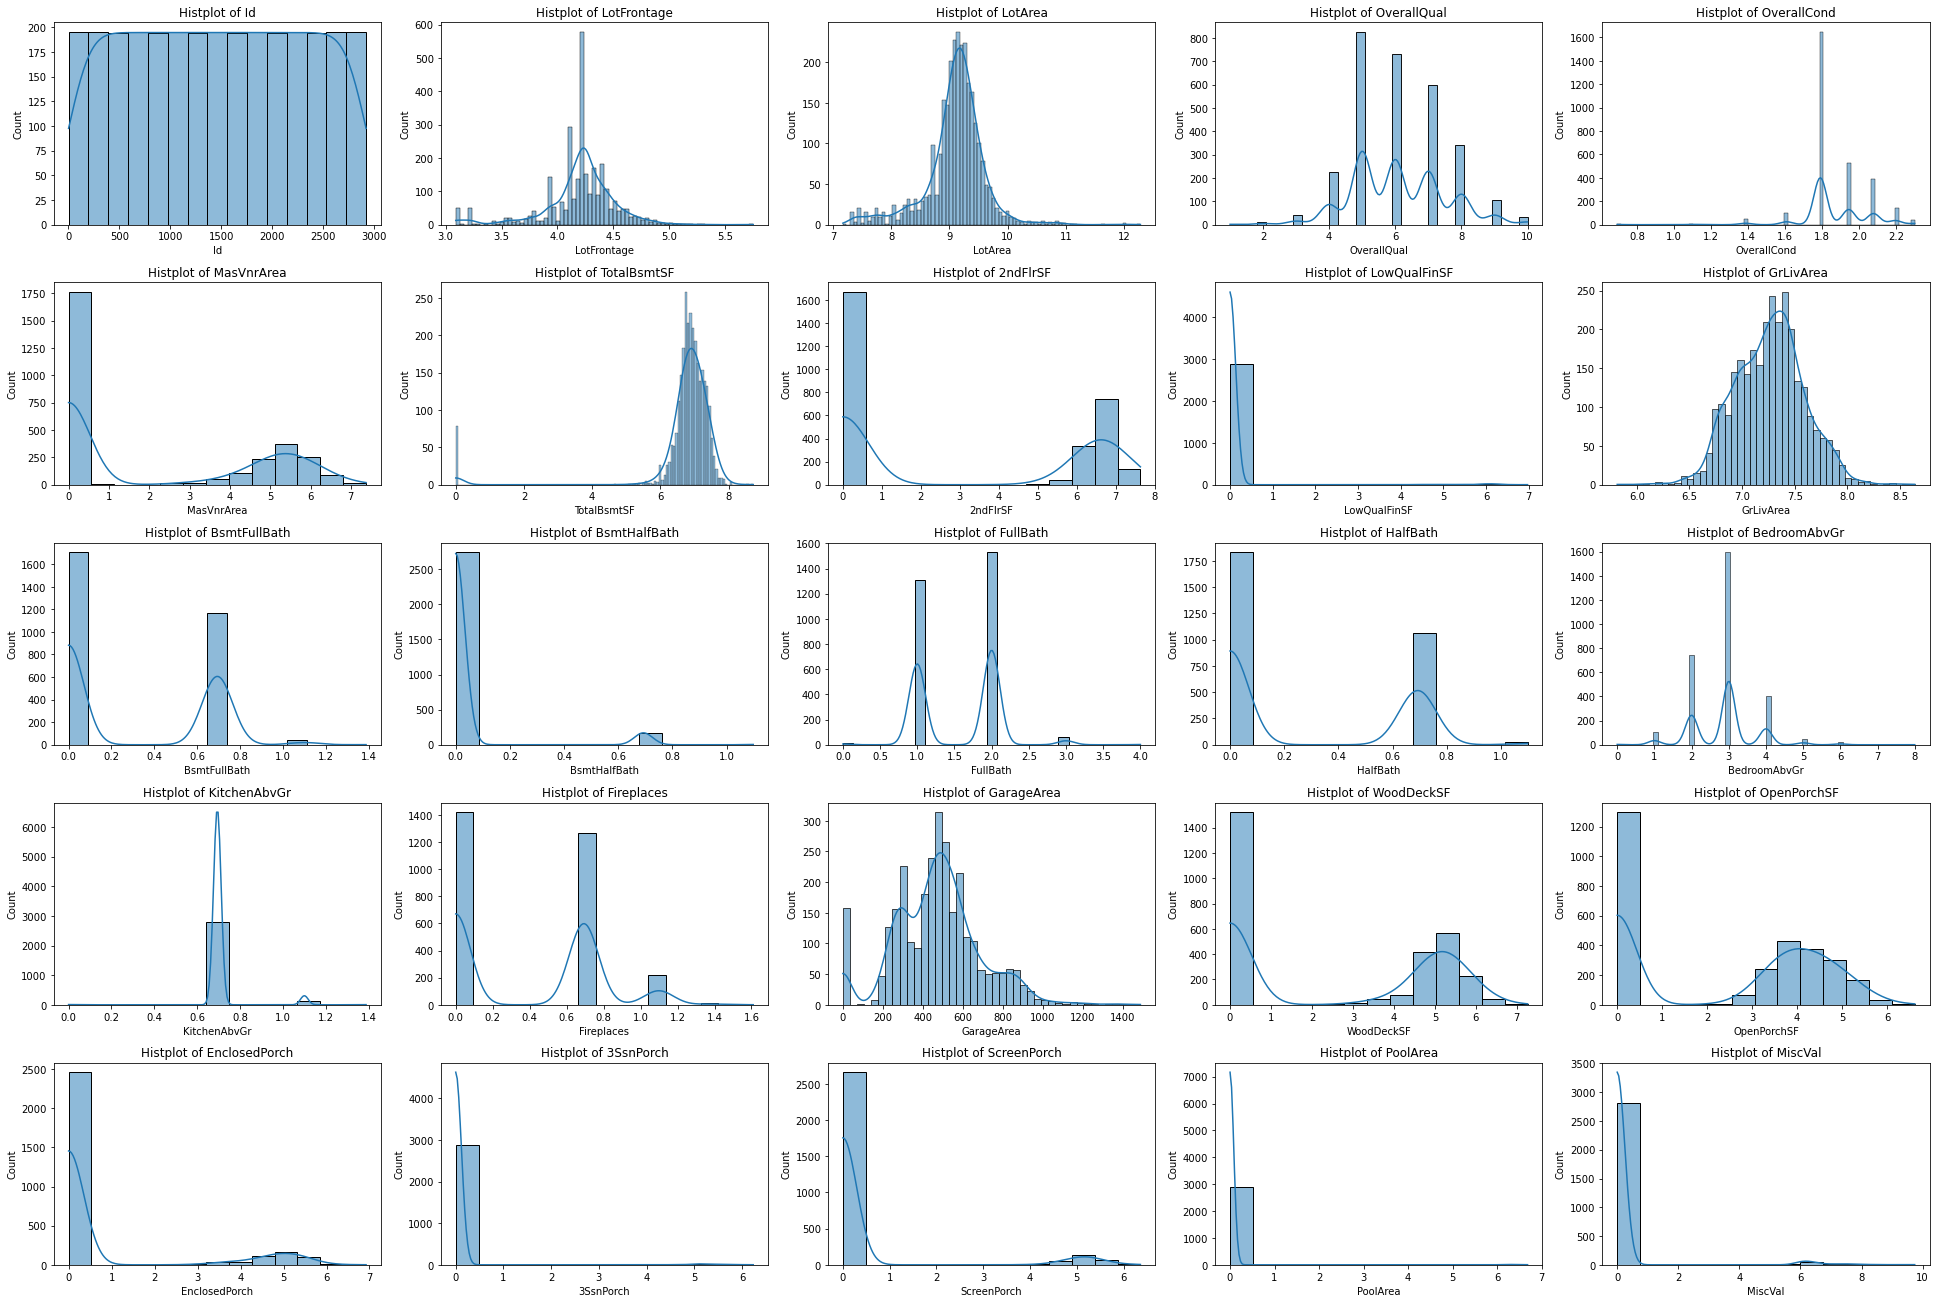

In [38]:
plt.figure(figsize = (27,25))

for i in range(len(num_cols)):
    plt.subplot(7, 5, i + 1)  # 6 Rows , 5 cols (=30 ; required 22 plots as len(num_col=22))
    sns.histplot(data= df3,x = df3[num_cols[i]],kde=True)
    plt.title('Histplot of {}'.format(num_cols[i]))
    plt.tight_layout()

In [39]:
target_log = np.log(target)

In [40]:
from scipy.stats import skew
df3[num_cols].skew()

Id                0.000000
LotFrontage      -0.994842
LotArea          -0.505010
OverallQual       0.197212
OverallCond      -0.746567
MasVnrArea        0.537294
TotalBsmtSF      -4.984291
2ndFlrSF          0.305206
LowQualFinSF      8.562091
GrLivArea         0.013194
BsmtFullBath      0.425385
BsmtHalfBath      3.776703
FullBath          0.167692
HalfBath          0.580990
BedroomAbvGr      0.326492
KitchenAbvGr      3.522161
Fireplaces        0.237710
GarageArea        0.241308
WoodDeckSF        0.158114
OpenPorchSF      -0.041819
EnclosedPorch     1.962089
3SsnPorch         8.829794
ScreenPorch       2.947420
PoolArea         15.006047
MiscVal           5.216665
dtype: float64

In [41]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [43]:
df4_dummy = pd.get_dummies(df3, columns = ['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition'], drop_first = True)

C:\Users\achyuth.v\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [44]:
col_dummys = df4_dummy.columns.tolist()

In [45]:
x_train = df4_dummy.loc[:1459,:]
y_train = target_log
x_test = df4_dummy.loc[1459:, :]

In [48]:
x_test.reset_index(inplace = True, drop = True)

In [49]:
x_test

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1460,4.330733,9.204121,5,1.945910,0.000000,7.136483,0.000000,0.0,7.136483,...,0,0,0,0,1,0,0,0,1,0
1,1461,4.394449,9.360741,5,1.945910,0.000000,6.783325,0.000000,0.0,6.799056,...,0,0,0,0,1,0,0,0,1,0
2,1462,4.406719,9.565775,6,1.945910,4.691348,7.192934,0.000000,0.0,7.192934,...,0,0,0,0,1,0,0,0,1,0
3,1463,4.317488,9.534668,5,1.791759,0.000000,6.834109,6.553933,0.0,7.396335,...,0,0,0,0,1,0,0,0,1,0
4,1464,4.369448,9.208238,6,1.945910,3.044522,6.831954,6.520621,0.0,7.380879,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2915,3.091042,7.568896,4,2.079442,0.000000,6.304449,6.304449,0.0,6.996681,...,0,0,0,0,1,0,0,0,1,0
1456,2916,3.091042,7.546974,4,1.791759,0.000000,6.304449,6.304449,0.0,6.996681,...,0,0,0,0,1,0,0,0,0,0
1457,2917,5.081404,9.903538,5,2.079442,0.000000,7.110696,0.000000,0.0,7.110696,...,0,0,0,0,1,0,0,0,0,0
1458,2918,4.143135,9.253591,5,1.791759,0.000000,6.816736,0.000000,0.0,6.878326,...,0,0,0,0,1,0,0,0,1,0


In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_train,y_train, test_size = 0.1, random_state = 11)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [61]:
scaler = StandardScaler()

In [59]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [63]:
Base_Models = [LinearRegression(),
               KNeighborsRegressor(),
               SVR(),
               DecisionTreeRegressor(),
               RandomForestRegressor(),
               AdaBoostRegressor(), 
               GradientBoostingRegressor()]

score = []
mae = []
rmse = []

for model in Base_Models:
    models = model
    
    models.fit(xtrain,ytrain)
    y_pred = models.predict(xtest)
    
    score.append(r2_score(ytest,y_pred) * 100)
    mae.append(mean_absolute_error(ytest,y_pred))
    rmse.append(np.sqrt(mean_squared_error(ytest,y_pred)))

In [64]:
result = {"Models":["LinearRegression","KNeighborsRegressor","SVR","DecisionTreeRegressor","RandomForestRegressor","AdaBoostRegressor","GradientBoostingRegressor"],
         "r2_score":score,
         "MAE":mae,
         "RMSE": rmse}
result = pd.DataFrame(result)
result = result.set_index("Models")

In [65]:
result

,r2_score,MAE,RMSE
Models,,,
LinearRegression,81.354379,0.106697,0.172324
KNeighborsRegressor,26.986390,0.257093,0.341003
SVR,39.173378,0.240782,0.311245
DecisionTreeRegressor,55.548497,0.175396,0.266072
RandomForestRegressor,84.687860,0.103327,0.156162
AdaBoostRegressor,78.457868,0.141138,0.185225
GradientBoostingRegressor,87.510609,0.092581,0.141035


In [66]:
from sklearn.model_selection import GridSearchCV

In [86]:
gb_model = GradientBoostingRegressor(learning_rate= 0.1,
 loss= 'huber',
 max_depth= 3,
 max_features= 'auto',
 max_leaf_nodes= 6,
 n_estimators= 150,
 random_state= 200)

In [72]:
param_grid = {"n_estimators": [100, 150, 200],
             "max_depth": [3, 7, 9],
             "loss": ['huber'],
             "learning_rate": [0.1],
             "random_state": [200],
             "max_features": ["auto"],
             "max_leaf_nodes": [6]
             }

In [73]:
grid_model = GridSearchCV(gb_model,param_grid=param_grid)

In [74]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1], 'loss': ['huber'],
                         'max_depth': [3, 7, 9], 'max_features': ['auto'],
                         'max_leaf_nodes': [6], 'n_estimators': [100, 150, 200],
                         'random_state': [200]})

In [75]:
grid_model.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 6,
 'n_estimators': 150,
 'random_state': 200}

In [82]:
grid_model.best_score_

0.8770538195563666

In [90]:
xtest.shape

(146, 432)

In [91]:
y_pred_1 = grid_model.predict(xtest)

In [93]:
r2_score(ytest,y_pred_1) * 100

88.3584257577264

In [79]:
grid_model.score(xtrain,ytrain)

0.9482747967699342

In [96]:
f_pred =  grid_model.predict(x_test)

In [100]:
out1 = np.exp(f_pred)

In [101]:
out1

array([149247.00360672, 121872.4476632 , 152279.99380704, ...,
       164604.57913797, 126047.43237343, 212674.70979861])

In [107]:
imp1 = pd.DataFrame()

In [99]:
x_test.shape, f_pred.shape

((1460, 432), (1460,))

In [102]:
x_test

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1460,4.330733,9.204121,5,1.945910,0.000000,7.136483,0.000000,0.0,7.136483,...,0,0,0,0,1,0,0,0,1,0
1,1461,4.394449,9.360741,5,1.945910,0.000000,6.783325,0.000000,0.0,6.799056,...,0,0,0,0,1,0,0,0,1,0
2,1462,4.406719,9.565775,6,1.945910,4.691348,7.192934,0.000000,0.0,7.192934,...,0,0,0,0,1,0,0,0,1,0
3,1463,4.317488,9.534668,5,1.791759,0.000000,6.834109,6.553933,0.0,7.396335,...,0,0,0,0,1,0,0,0,1,0
4,1464,4.369448,9.208238,6,1.945910,3.044522,6.831954,6.520621,0.0,7.380879,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2915,3.091042,7.568896,4,2.079442,0.000000,6.304449,6.304449,0.0,6.996681,...,0,0,0,0,1,0,0,0,1,0
1456,2916,3.091042,7.546974,4,1.791759,0.000000,6.304449,6.304449,0.0,6.996681,...,0,0,0,0,1,0,0,0,0,0
1457,2917,5.081404,9.903538,5,2.079442,0.000000,7.110696,0.000000,0.0,7.110696,...,0,0,0,0,1,0,0,0,0,0
1458,2918,4.143135,9.253591,5,1.791759,0.000000,6.816736,0.000000,0.0,6.878326,...,0,0,0,0,1,0,0,0,1,0


In [108]:
imp1['Id'] = x_test['Id']
imp1['SalePrice'] = out1

In [111]:
imp1 = imp1.iloc[1:,:]

In [112]:
imp1.to_csv('sub2.csv', index = False)